<a href="https://colab.research.google.com/github/hchenaisi/Python_learning/blob/main/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chapter 2, Supervised Learning
In supervised learning, we want to build a model on the training data and then be able to make accurate predictions on new, unseen data that has the same characteristics as the training set that we used.

     |████████████████████████████████| 540 kB 4.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=ca28a7b593eb64085f2e0cc275b4600cd1ea0898b63187af4c909e1255c02300
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


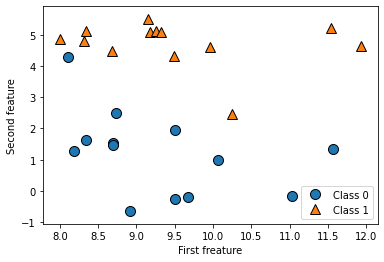

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install mglearn
import mglearn

# generate dataset
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First freature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))